In [1]:
import pandas as pd
import numpy as np

import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [7]:
end = dt.datetime(2023,2,10)
start = dt.datetime(2003,2,10)
spy = pdr.get_data_yahoo('SPY', start, end)

[*********************100%***********************]  1 of 1 completed


### Log

In [ ]:
# https://tlc.thinkorswim.com/center/reference/Tech-Indicators/studies-library/G-L/HistoricalVolatility

In [3]:
spy['Log Return'] = np.log(spy['Close'] / spy['Close'].shift())
spy = spy.dropna()
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2003-02-11 00:00:00-05:00,84.370003,84.879997,82.830002,83.430000,56.842400,46861000,-0.006928
2003-02-12 00:00:00-05:00,83.160004,83.620003,82.089996,82.099998,55.936256,35873600,-0.016070
2003-02-13 00:00:00-05:00,82.150002,82.660004,81.000000,82.349998,56.106613,57934100,0.003040
2003-02-14 00:00:00-05:00,82.370003,84.199997,81.820000,84.150002,57.332958,59580900,0.021623
2003-02-18 00:00:00-05:00,84.529999,85.800003,84.389999,85.629997,58.341320,39492700,0.017435


In [4]:
spy['Log Return'].describe(percentiles=[0.25, 0.35, 0.75, 0.9])

count    5035.000000
mean        0.000313
std         0.012069
min        -0.115887
25%        -0.004173
35%        -0.001799
50%         0.000654
75%         0.005771
90%         0.011935
max         0.135577
Name: Log Return, dtype: float64

In [5]:
# lo que se calculará es el trailling volatility, asumiendo que la volatilidad se va actualizando.
volatility = spy['Log Return'].rolling(window = 21).std() * np.sqrt(252)
volatility.tail(5)

Date
2023-02-03 00:00:00-05:00    0.172498
2023-02-06 00:00:00-05:00    0.167602
2023-02-07 00:00:00-05:00    0.156784
2023-02-08 00:00:00-05:00    0.163951
2023-02-09 00:00:00-05:00    0.167772
Name: Log Return, dtype: float64

<AxesSubplot:xlabel='Date'>

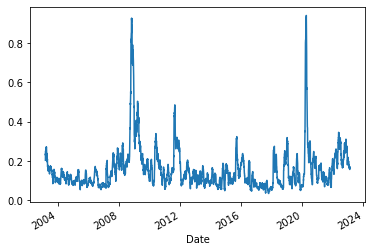

In [6]:
volatility.plot()

In [88]:
volatility.describe(percentiles = [0.25, 0.75, 0.85])

count    5015.000000
mean        0.157861
std         0.110796
min         0.034734
25%         0.093216
50%         0.129868
75%         0.186536
85%         0.228117
max         0.939958
Name: Log Return, dtype: float64

### ATR

In [18]:
high_low = spy['High'] - spy['Low']
high_cp = np.abs(spy['High'] - spy['Close'].shift())
low_cp = np.abs(spy['Low'] - spy['Close'].shift())

concat = pd.concat([high_low, high_cp, low_cp], axis = 1)

max_range = np.max(concat, axis = 1)

# ATR a con periocidad del último 1 mes
atr = max_range.rolling(14).mean()
atr.tail()

Date
2023-02-03 00:00:00-05:00    6.224287
2023-02-06 00:00:00-05:00    6.301429
2023-02-07 00:00:00-05:00    6.307142
2023-02-08 00:00:00-05:00    6.380716
2023-02-09 00:00:00-05:00    6.459287
dtype: float64

In [19]:
# Quiero el ATR como porcentaje del cierre previo
close = spy['Close']
close_atr = pd.concat([close, atr], axis = 1, keys= ['Close', 'ATR'])
close_atr.tail()

,Close,ATR
Date,,
2023-02-03 00:00:00-05:00,412.350006,6.224287
2023-02-06 00:00:00-05:00,409.829987,6.301429
2023-02-07 00:00:00-05:00,415.190002,6.307142
2023-02-08 00:00:00-05:00,410.649994,6.380716
2023-02-09 00:00:00-05:00,407.089996,6.459287


In [20]:
close_atr['ATR/Close'] = close_atr['ATR'] / close_atr['Close'].shift()
close_atr

,Close,ATR,ATR/Close
Date,,,
2003-02-10 00:00:00-05:00,84.010002,NaN,NaN
2003-02-11 00:00:00-05:00,83.430000,NaN,NaN
2003-02-12 00:00:00-05:00,82.099998,NaN,NaN
2003-02-13 00:00:00-05:00,82.349998,NaN,NaN
2003-02-14 00:00:00-05:00,84.150002,NaN,NaN
...,...,...,...
2023-02-03 00:00:00-05:00,412.350006,6.224287,0.014934
2023-02-06 00:00:00-05:00,409.829987,6.301429,0.015282
2023-02-07 00:00:00-05:00,415.190002,6.307142,0.015390


<AxesSubplot:xlabel='Date'>

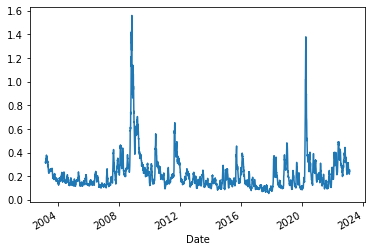

In [21]:
atr_volatility = close_atr['ATR/Close'] * np.sqrt(252)
atr_volatility.plot()

### Range

In [23]:
range_high_low = pd.concat([spy['Open'], high_low], axis = 1, keys= ['Open', 'Range Daily'])
range_high_low.tail()  

,Open,Range Daily
Date,,
2023-02-03 00:00:00-05:00,411.589996,5.880005
2023-02-06 00:00:00-05:00,409.790009,3.190002
2023-02-07 00:00:00-05:00,408.869995,8.919983
2023-02-08 00:00:00-05:00,413.130005,4.600006
2023-02-09 00:00:00-05:00,414.410004,8.760010


In [24]:
range_high_low['Range/Open'] = range_high_low['Range Daily'] / range_high_low['Open']
range_high_low

,Open,Range Daily,Range/Open
Date,,,
2003-02-10 00:00:00-05:00,83.459999,1.479996,0.017733
2003-02-11 00:00:00-05:00,84.370003,2.049995,0.024298
2003-02-12 00:00:00-05:00,83.160004,1.530006,0.018398
2003-02-13 00:00:00-05:00,82.150002,1.660004,0.020207
2003-02-14 00:00:00-05:00,82.370003,2.379997,0.028894
...,...,...,...
2023-02-03 00:00:00-05:00,411.589996,5.880005,0.014286
2023-02-06 00:00:00-05:00,409.790009,3.190002,0.007784
2023-02-07 00:00:00-05:00,408.869995,8.919983,0.021816


<AxesSubplot:xlabel='Date'>

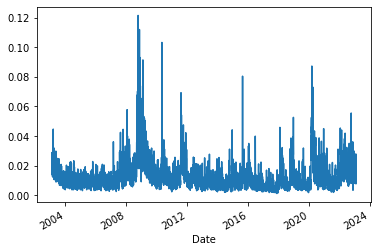

In [27]:
range_high_low['Range/Open'].plot()

In [28]:
range_high_low['Range/Open'].describe()

count    5036.000000
mean        0.012602
std         0.010255
min         0.001229
25%         0.006616
50%         0.009859
75%         0.015021
max         0.121445
Name: Range/Open, dtype: float64

In [31]:
range_annualized = range_high_low['Range/Open'] * np.sqrt(252)
range_annualized.describe()

count    5036.000000
mean        0.200044
std         0.162794
min         0.019514
25%         0.105033
50%         0.156503
75%         0.238454
max         1.927873
Name: Range/Open, dtype: float64